# Paso 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df =  pd.read_csv('/datasets/games.csv')

# Paso 2

In [3]:
print(df.info())
print()
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         

In [4]:
df.columns = df.columns.str.lower()

print(df)

                                name platform  year_of_release         genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16711               LMA Manager 2007     X360           2006.0        Sports   
16712        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16713               Spirits & Spells      GBA           2003.0      Platform   
16714            Winning Post 8 2016      PSV           2016.0    Simulation   

       na_sales  eu_sales  jp_sales  ot

In [5]:
print(df['year_of_release'].unique())
df['year_of_release'] = pd.to_numeric(df['year_of_release'], errors='coerce')

[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]


In [6]:

#Cambiar Type en: Year of release, User score.

#La columna Year of release tiene el tipo float64 y se cambiara al tipo Integer. Esto es debido a que no es necesario tener los decimales en el año en que salio el juego.
df['year_of_release'] = df['year_of_release'].astype('Int64')

#La columna User score tiene el tipo Object y se cambiara al tipo float64. El cambio se hara ya que es mas conveniente el poder comparar los datos con el resto de las reviews. 
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

#Reemplazar los valores nulos de critic_score y user_score por la mediana correspondiente a cada columna.
df['critic_score'] = df['critic_score'].fillna(df['critic_score'].median())
df['user_score'] = df['user_score'].fillna(df['user_score'].median())


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


In [7]:
print(df['year_of_release'].unique())
print(df['name'].unique())
print(df['genre'].unique())
print(df['rating'].unique())

<IntegerArray>
[2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010, 2013, 2004,
 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014, 1992, 1997, 1993, 1994,
 1982, 2016, 2003, 1986, 2000, <NA>, 1995, 1991, 1981, 1987, 1980, 1983]
Length: 38, dtype: Int64
['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]
['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


In [8]:
#Cambiar los datos ausentes con las siglas tbd = To Be Determined

df['name'] = df['name'].fillna('tbd')
df['genre'] = df['genre'].fillna('tbd')
df['rating'] = df['rating'].fillna('tbd')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


In [9]:
# Calcular ventas totales
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Verificar los cambios
print(df.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45          76.0         8.0      E   
1      3.58      6.81         0.77          71.0         7.5    tbd   
2     12.76      3.79         3.29          82.0         8.3      E   
3     10.93      3.28         2.95          80.0         8.0      E   
4      8.89     10.22         1.00          71.0         7.5    tbd   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3        32.77  
4

# Paso 3

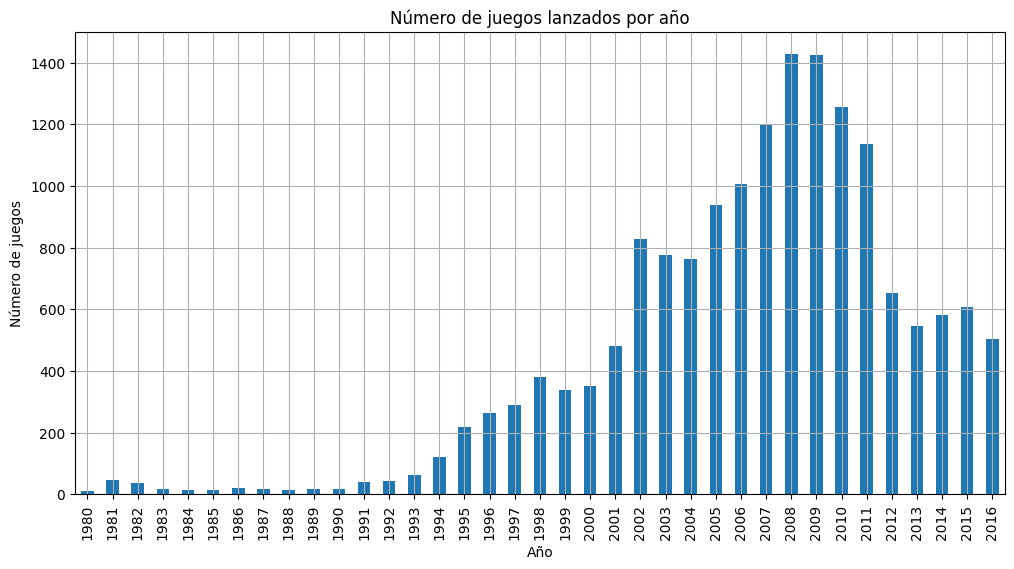

In [10]:
# Contar el número de juegos lanzados cada año
games_per_year = df['year_of_release'].value_counts().sort_index()

# Graficar el número de juegos lanzados por año
plt.figure(figsize=(12, 6))
games_per_year.plot(kind='bar')
plt.title('Número de juegos lanzados por año')
plt.xlabel('Año')
plt.ylabel('Número de juegos')
plt.grid(True)
plt.show()

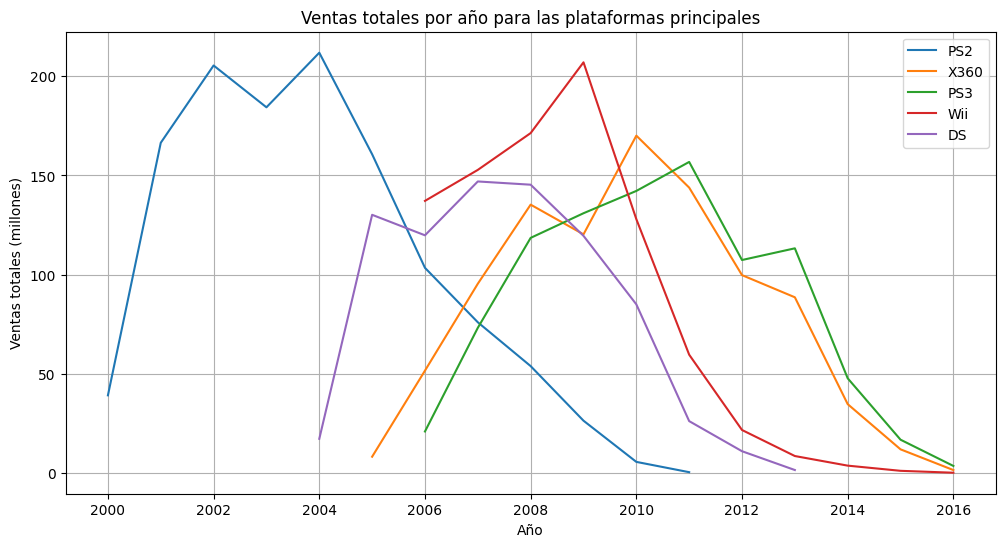

In [11]:
# Calcular las ventas totales por plataforma
platform_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Seleccionar las plataformas con mayores ventas totales
top_platforms = platform_sales.head(5).index

# Filtrar el dataset para las plataformas seleccionadas
df_top_platforms = df[(df['platform'].isin(top_platforms)) & (df['year_of_release'] >= 1995) & (df['year_of_release'] <= 2017)]

# Graficar la distribución de ventas por año para las plataformas seleccionadas
plt.figure(figsize=(12, 6))
for platform in top_platforms:
    platform_data = df_top_platforms[df_top_platforms['platform'] == platform]
    sales_per_year = platform_data.groupby('year_of_release')['total_sales'].sum()
    plt.plot(sales_per_year.index, sales_per_year, label=platform)

plt.title('Ventas totales por año para las plataformas principales')
plt.xlabel('Año')
plt.ylabel('Ventas totales (millones)')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
# Filtrar los datos para los últimos 5 años
df_recent = df[df['year_of_release'] >= 2012]

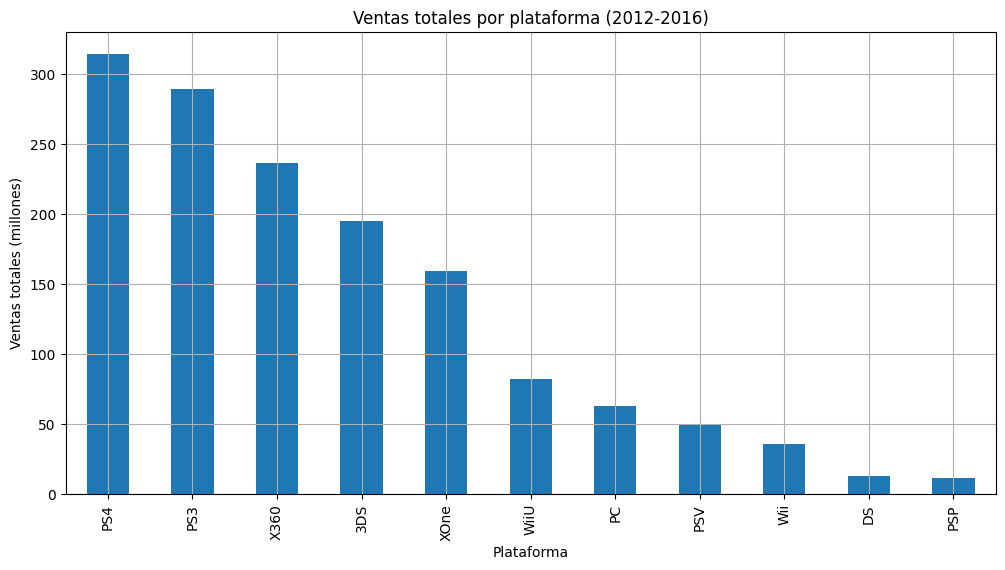

Plataformas potencialmente rentables: ['PS4', 'PS3', 'X360', '3DS', 'XOne']


In [13]:
# Calcular las ventas totales por plataforma en el período reciente
recent_platform_sales = df_recent.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Graficar las ventas totales de plataformas en el período reciente
plt.figure(figsize=(12, 6))
recent_platform_sales.plot(kind='bar')
plt.title('Ventas totales por plataforma (2012-2016)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas totales (millones)')
plt.grid(True)
plt.show()

# Mostrar plataformas potencialmente rentables
print("Plataformas potencialmente rentables:", recent_platform_sales.head(5).index.tolist())

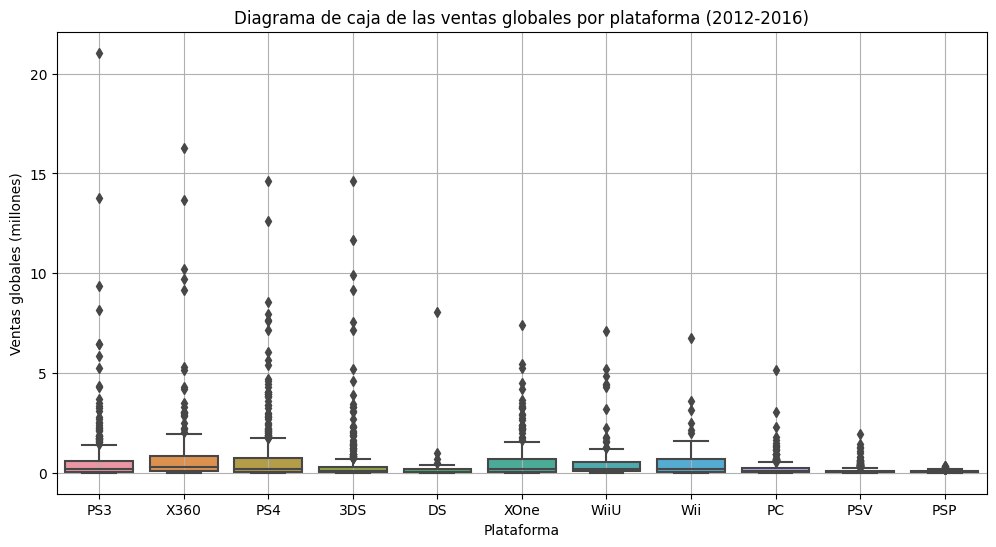

In [14]:
# Crear un diagrama de caja de las ventas globales por plataforma
plt.figure(figsize=(12, 6))
sns.boxplot(x='platform', y='total_sales', data=df_recent)
plt.title('Diagrama de caja de las ventas globales por plataforma (2012-2016)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales (millones)')
plt.grid(True)
plt.show()

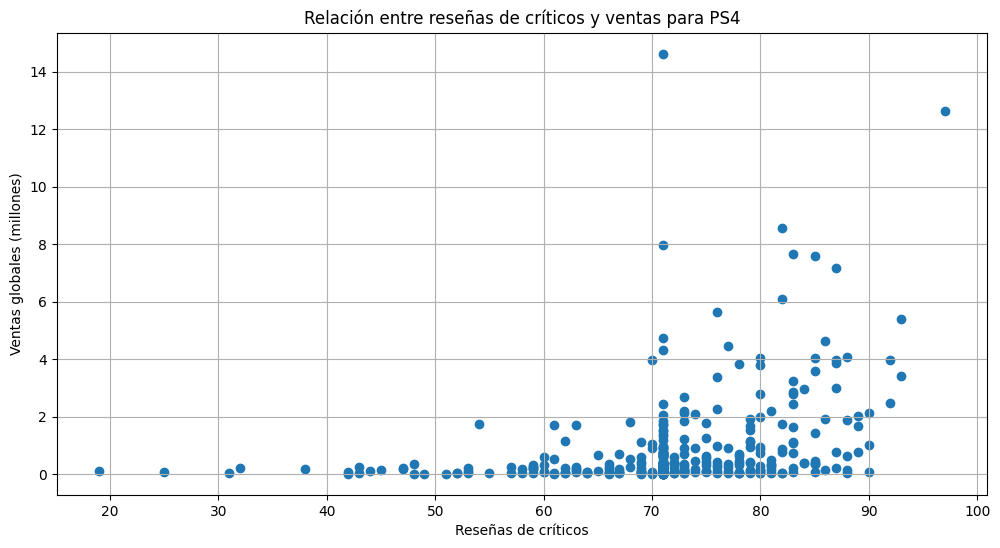

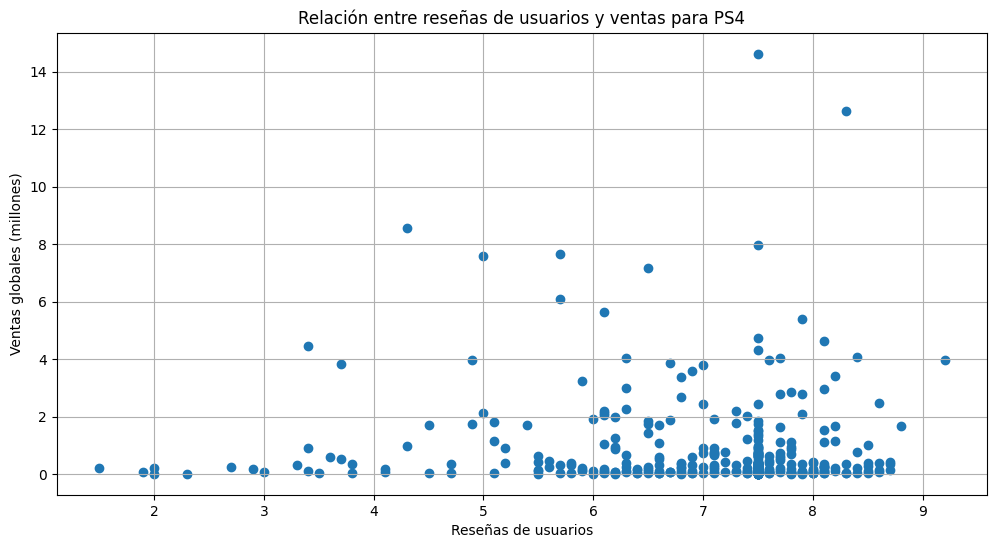

Correlación entre reseñas de críticos y ventas para PS4: 0.3387064530024634
Correlación entre reseñas de usuarios y ventas para PS4: -0.06275557891282788


In [15]:
# Seleccionar una plataforma popular (PS4) para analizar
platform = 'PS4'
platform_data = df_recent[df_recent['platform'] == platform]

# Graficar la relación entre las reseñas de críticos y las ventas
plt.figure(figsize=(12, 6))
plt.scatter(platform_data['critic_score'], platform_data['total_sales'])
plt.title('Relación entre reseñas de críticos y ventas para PS4')
plt.xlabel('Reseñas de críticos')
plt.ylabel('Ventas globales (millones)')
plt.grid(True)
plt.show()

# Graficar la relación entre las reseñas de usuarios y las ventas
plt.figure(figsize=(12, 6))
plt.scatter(platform_data['user_score'], platform_data['total_sales'])
plt.title('Relación entre reseñas de usuarios y ventas para PS4')
plt.xlabel('Reseñas de usuarios')
plt.ylabel('Ventas globales (millones)')
plt.grid(True)
plt.show()

# Calcular la correlación entre reseñas y ventas
critic_corr = platform_data['critic_score'].corr(platform_data['total_sales'])
user_corr = platform_data['user_score'].corr(platform_data['total_sales'])

print(f"Correlación entre reseñas de críticos y ventas para PS4: {critic_corr}")
print(f"Correlación entre reseñas de usuarios y ventas para PS4: {user_corr}")

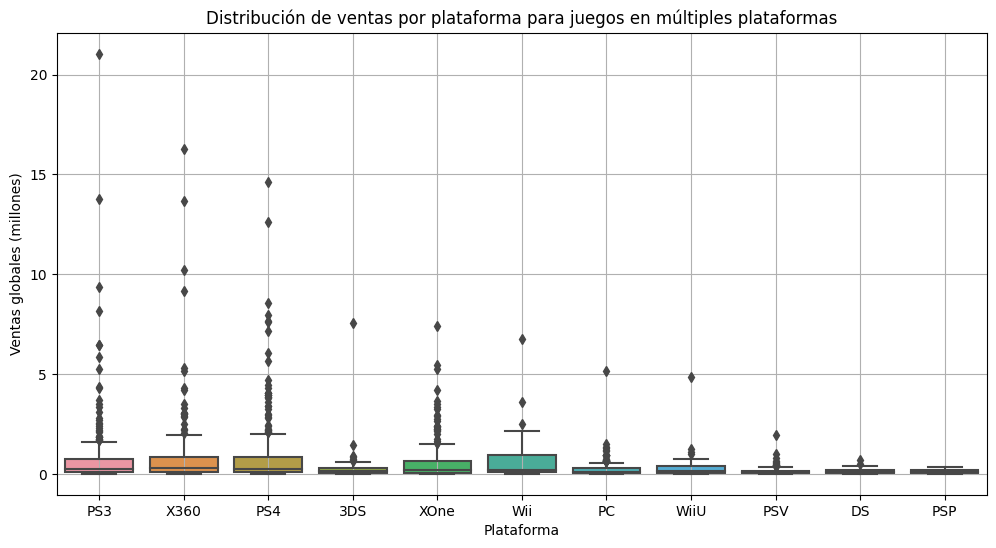

In [16]:
# Seleccionar los juegos que están en múltiples plataformas
multi_platform_games = df_recent[df_recent['name'].duplicated(keep=False)]

# Graficar la distribución de ventas por plataforma para juegos en múltiples plataformas
plt.figure(figsize=(12, 6))
sns.boxplot(x='platform', y='total_sales', data=multi_platform_games)
plt.title('Distribución de ventas por plataforma para juegos en múltiples plataformas')
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales (millones)')
plt.grid(True)
plt.show()

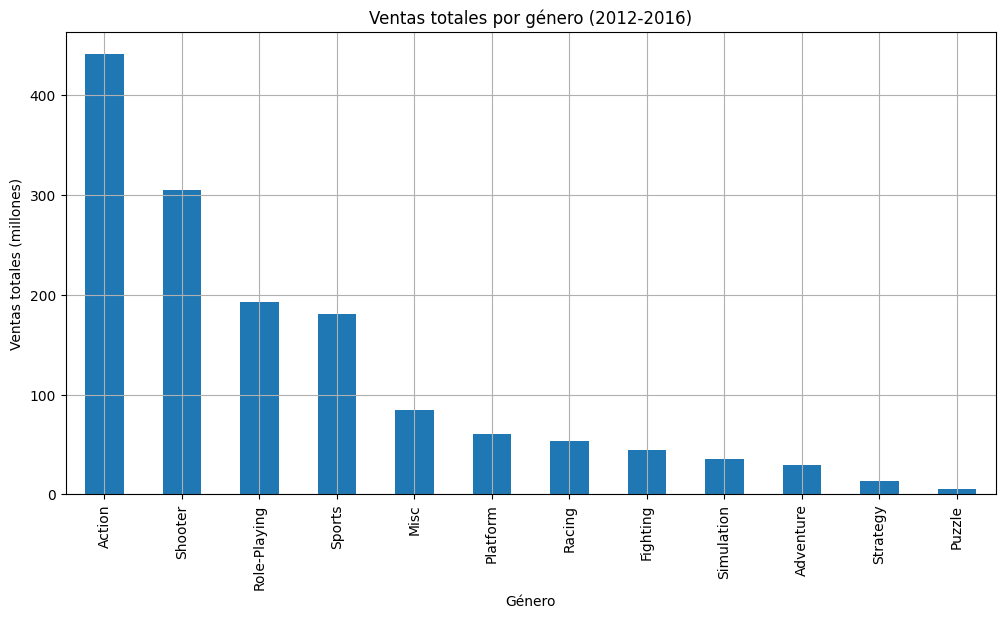

In [17]:
# Calcular las ventas totales por género
genre_sales = df_recent.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Graficar las ventas totales por género
plt.figure(figsize=(12, 6))
genre_sales.plot(kind='bar')
plt.title('Ventas totales por género (2012-2016)')
plt.xlabel('Género')
plt.ylabel('Ventas totales (millones)')
plt.grid(True)
plt.show()

# Paso 4

Top 5 plataformas en na_sales:
platform
X360    140.05
PS4     108.74
PS3     103.38
XOne     93.12
3DS      55.31
Name: na_sales, dtype: float64



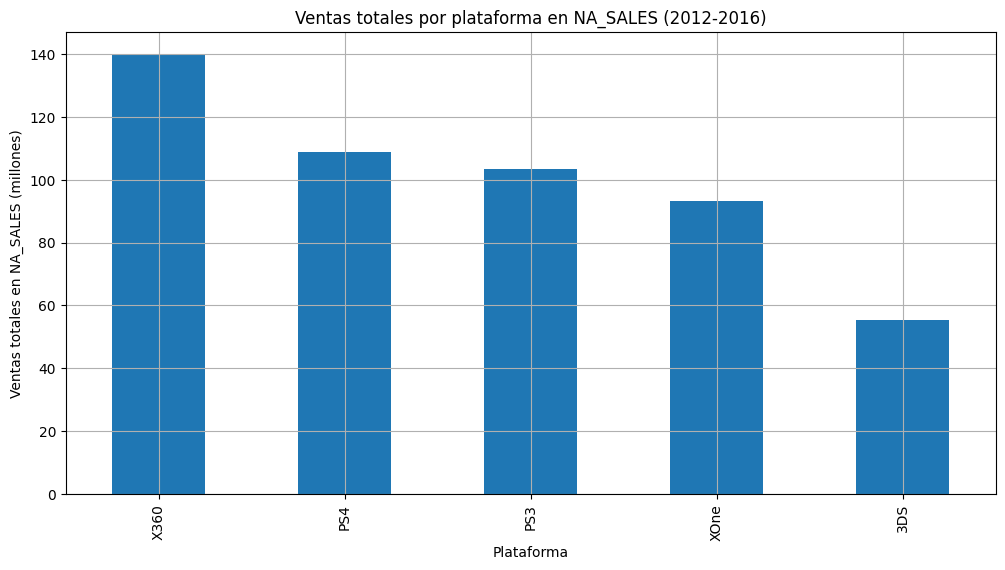

Top 5 plataformas en eu_sales:
platform
PS4     141.09
PS3     106.86
X360     74.52
XOne     51.59
3DS      42.64
Name: eu_sales, dtype: float64



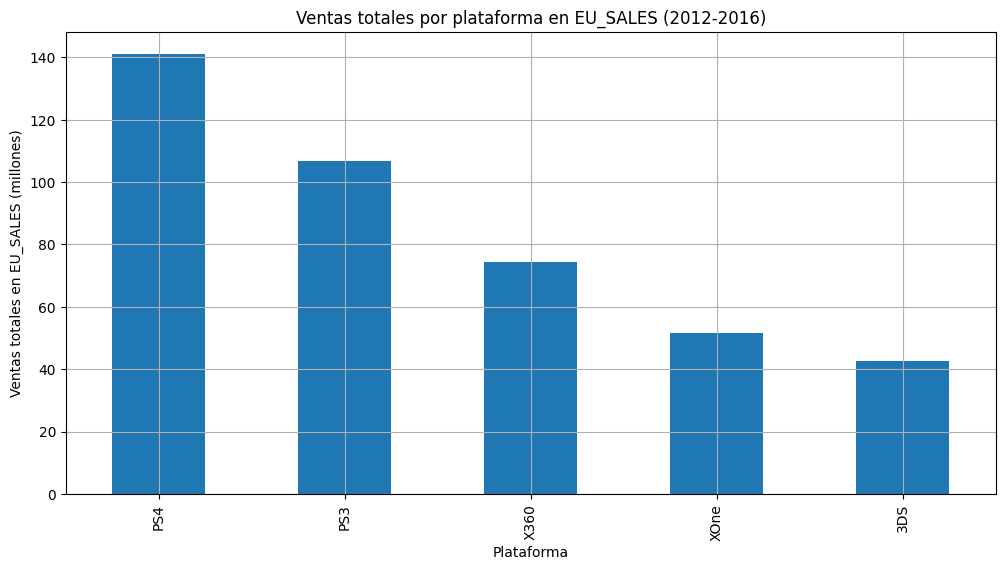

Top 5 plataformas en jp_sales:
platform
3DS     87.79
PS3     35.29
PSV     21.04
PS4     15.96
WiiU    13.01
Name: jp_sales, dtype: float64



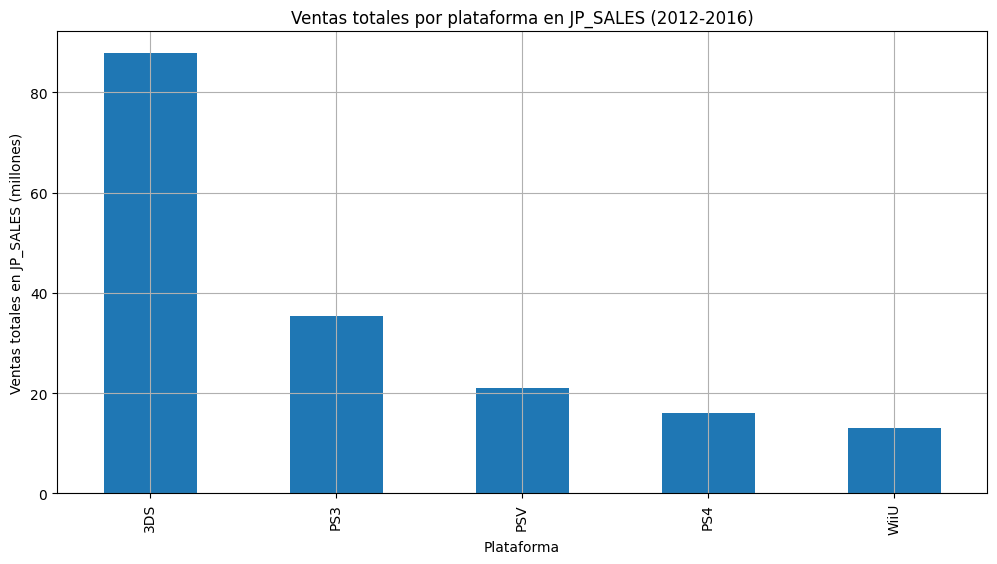

In [18]:
regions = ['na_sales', 'eu_sales', 'jp_sales']

for region in regions:
    region_platform_sales = df_recent.groupby('platform')[region].sum().sort_values(ascending=False)
    top_platforms_region = region_platform_sales.head(5)
    print(f"Top 5 plataformas en {region}:\n{top_platforms_region}\n")
    
    # Graficar la distribución de ventas por plataforma en la región
    plt.figure(figsize=(12, 6))
    top_platforms_region.plot(kind='bar')
    plt.title(f'Ventas totales por plataforma en {region.upper()} (2012-2016)')
    plt.xlabel('Plataforma')
    plt.ylabel(f'Ventas totales en {region.upper()} (millones)')
    plt.grid(True)
    plt.show()

Top 5 géneros en na_sales:
genre
Action          177.84
Shooter         144.77
Sports           81.53
Role-Playing     64.00
Misc             38.19
Name: na_sales, dtype: float64



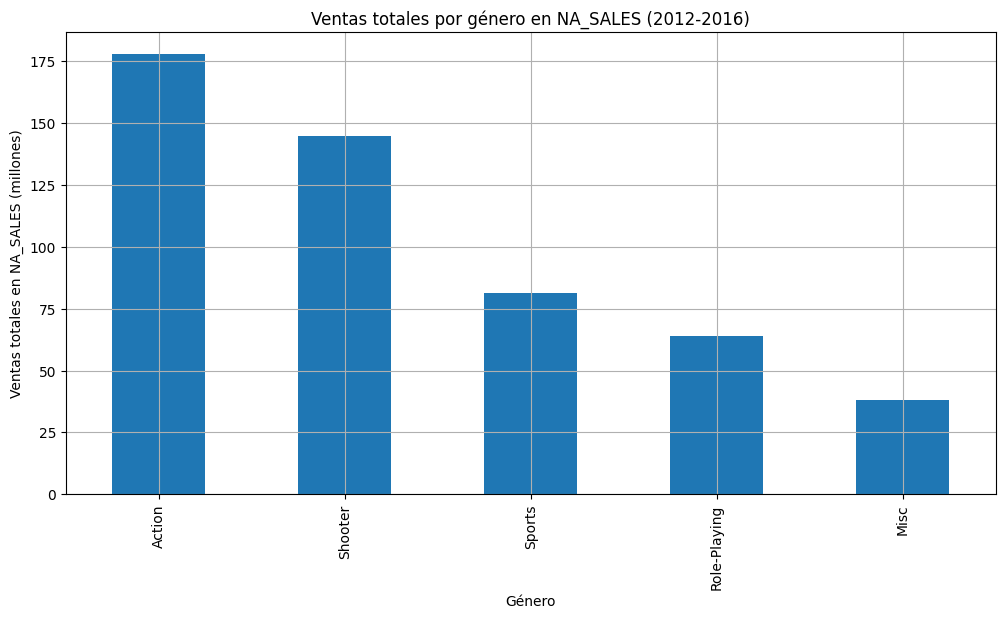

Top 5 géneros en eu_sales:
genre
Action          159.34
Shooter         113.47
Sports           69.09
Role-Playing     48.53
Racing           27.29
Name: eu_sales, dtype: float64



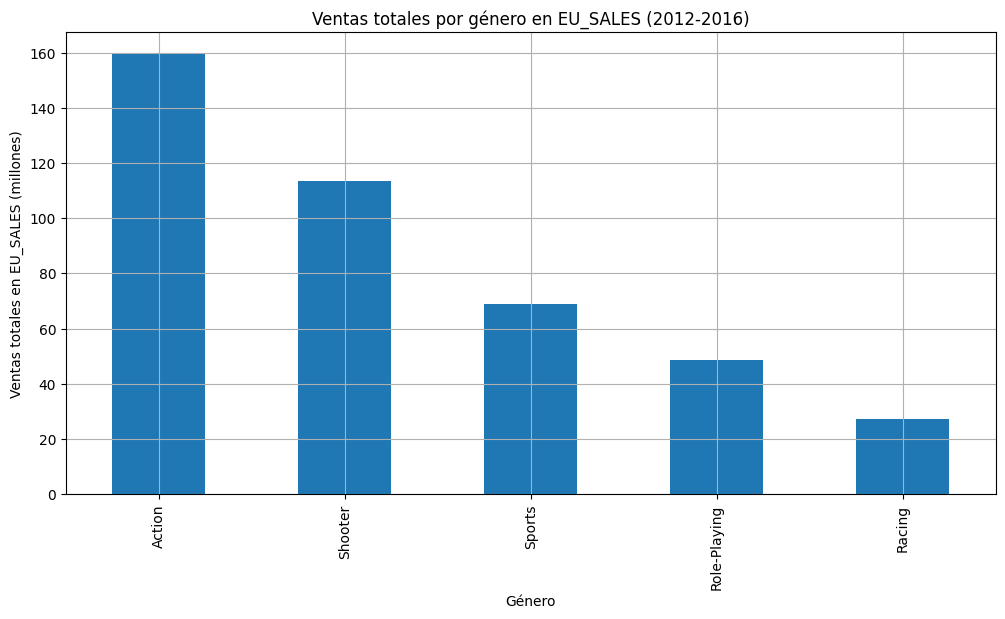

Top 5 géneros en jp_sales:
genre
Role-Playing    65.44
Action          52.80
Misc            12.86
Simulation      10.41
Fighting         9.44
Name: jp_sales, dtype: float64



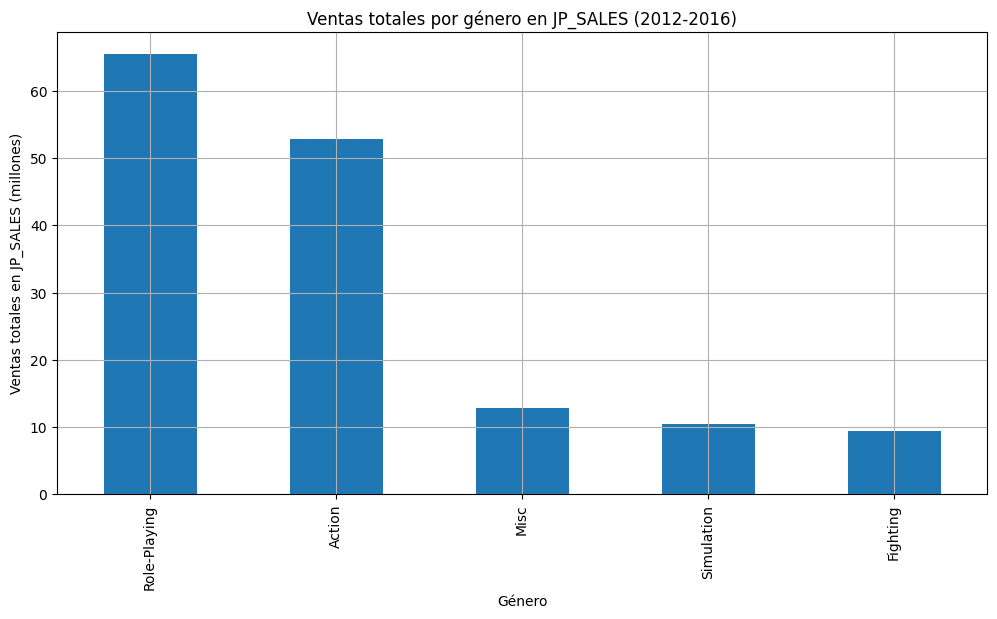

In [19]:
for region in regions:
    region_genre_sales = df_recent.groupby('genre')[region].sum().sort_values(ascending=False)
    top_genres_region = region_genre_sales.head(5)
    print(f"Top 5 géneros en {region}:\n{top_genres_region}\n")
    
    # Graficar la distribución de ventas por género en la región
    plt.figure(figsize=(12, 6))
    top_genres_region.plot(kind='bar')
    plt.title(f'Ventas totales por género en {region.upper()} (2012-2016)')
    plt.xlabel('Género')
    plt.ylabel(f'Ventas totales en {region.upper()} (millones)')
    plt.grid(True)
    plt.show()

Top 5 géneros en na_sales:
genre
Action          177.84
Shooter         144.77
Sports           81.53
Role-Playing     64.00
Misc             38.19
Name: na_sales, dtype: float64



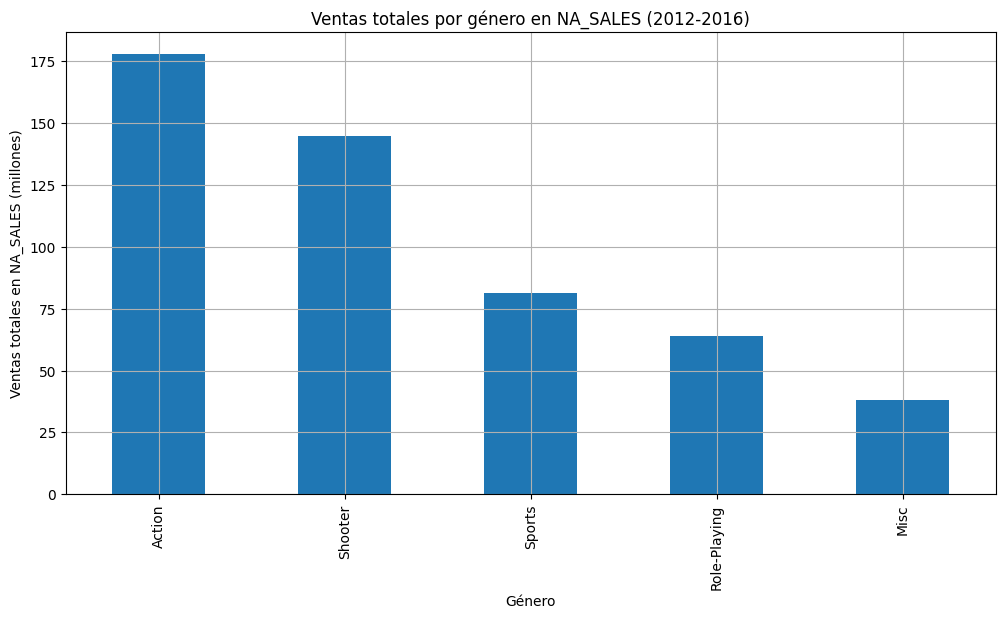

Top 5 géneros en eu_sales:
genre
Action          159.34
Shooter         113.47
Sports           69.09
Role-Playing     48.53
Racing           27.29
Name: eu_sales, dtype: float64



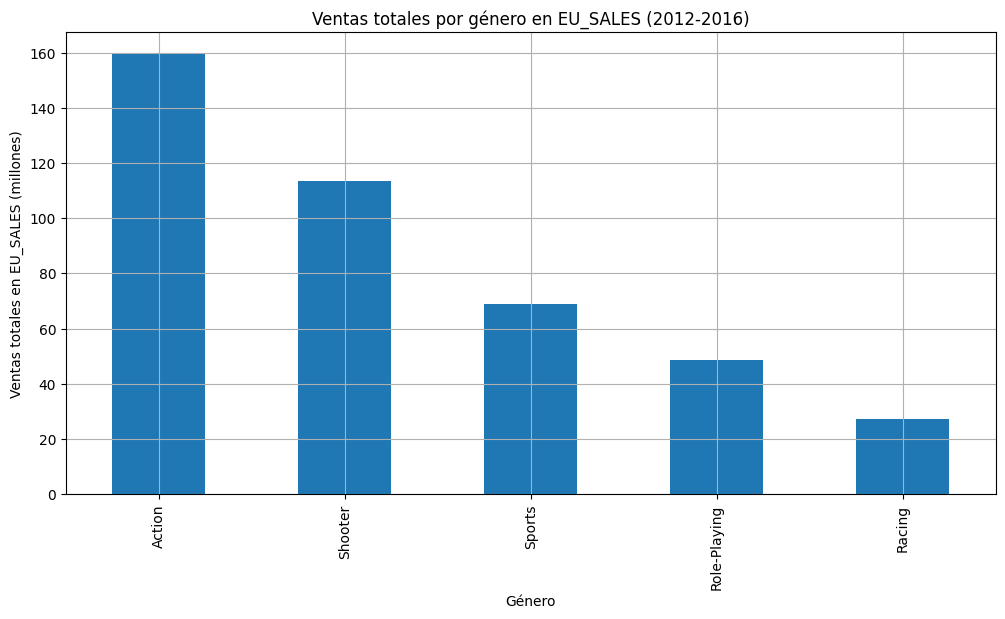

Top 5 géneros en jp_sales:
genre
Role-Playing    65.44
Action          52.80
Misc            12.86
Simulation      10.41
Fighting         9.44
Name: jp_sales, dtype: float64



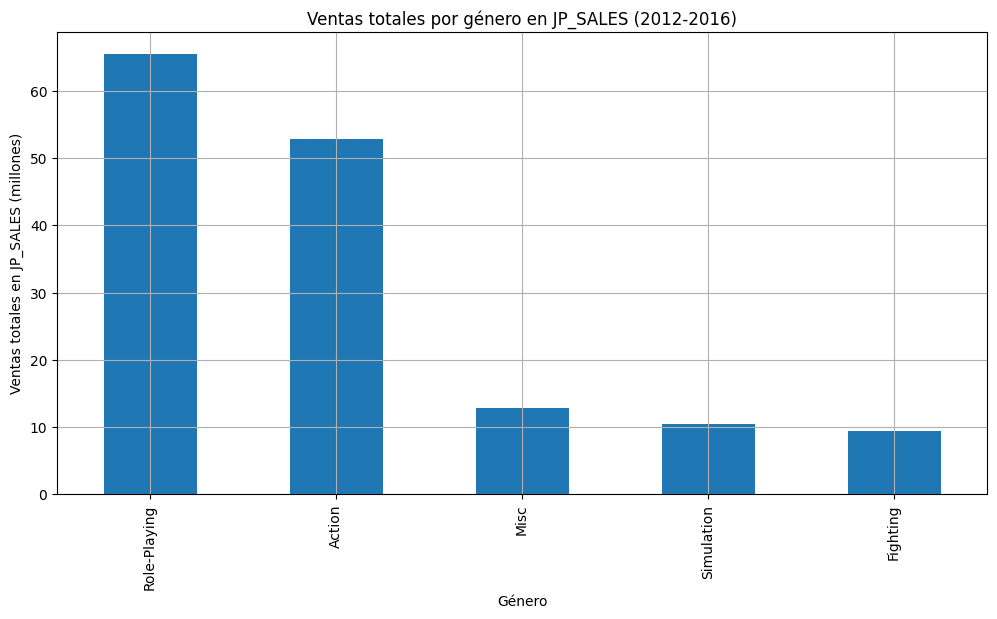

In [20]:
for region in regions:
    region_genre_sales = df_recent.groupby('genre')[region].sum().sort_values(ascending=False)
    top_genres_region = region_genre_sales.head(5)
    print(f"Top 5 géneros en {region}:\n{top_genres_region}\n")
    
    # Graficar la distribución de ventas por género en la región
    plt.figure(figsize=(12, 6))
    top_genres_region.plot(kind='bar')
    plt.title(f'Ventas totales por género en {region.upper()} (2012-2016)')
    plt.xlabel('Género')
    plt.ylabel(f'Ventas totales en {region.upper()} (millones)')
    plt.grid(True)
    plt.show()

# Paso 5

In [21]:
# Filtrar datos para Xbox One y PC
xbox_one_scores = df_recent[df_recent['platform'] == 'XOne']['user_score'].dropna()
pc_scores = df_recent[df_recent['platform'] == 'PC']['user_score'].dropna()

# Realizar la prueba t
t_stat, p_value = stats.ttest_ind(xbox_one_scores, pc_scores, equal_var=False)

print(f"t-statistic: {t_stat}, p-value: {p_value}")

if p_value < 0.05:
    print("Rechazamos la hipótesis nula: Las calificaciones promedio de usuarios son diferentes entre Xbox One y PC.")
else:
    print("No rechazamos la hipótesis nula: No hay evidencia suficiente para afirmar que las calificaciones promedio de usuarios son diferentes entre Xbox One y PC.")

t-statistic: 1.2697297005594277, p-value: 0.20480155503400313
No rechazamos la hipótesis nula: No hay evidencia suficiente para afirmar que las calificaciones promedio de usuarios son diferentes entre Xbox One y PC.


In [22]:
# Filtrar datos para Acción y Deportes
action_sales = df_recent[df_recent['genre'] == 'Action']['user_score'].dropna()
sports_sales = df_recent[df_recent['genre'] == 'Sports']['user_score'].dropna()

# Realizar la prueba t
t_stat, p_value = stats.ttest_ind(action_sales, sports_sales, equal_var=False)

print(f"t-statistic: {t_stat}, p-value: {p_value}")

if p_value < 0.05:
    print("Rechazamos la hipótesis nula: Las calificaciones promedio de juegos de Acción y Deportes son diferentes.")
else:
    print("No rechazamos la hipótesis nula: No hay evidencia suficiente para afirmar que las calificaciones promedio de juegos de Acción y Deportes son diferentes.")

t-statistic: 10.308277299253419, p-value: 1.1016280097403209e-21
Rechazamos la hipótesis nula: Las calificaciones promedio de juegos de Acción y Deportes son diferentes.


# Paso 6

##Conclusiones

Tras analizar los datos podemos observar una clara variacion de las ventas de videojuegos conforme van pasando los años, estas siguiendo direcatamente la tendencia de las nuevas consolas salidas al mercado. Tras la salida de una nueva plataforma, las ventas de los videojuegos en plataformas anteriores van disminuyendo proporcionalmente al aumento de ventas de videojuegos en plataformas nuevas. 

Existen mas variables al momento de estar viendo los datos: el genero, la calificacion, y la plataforma o plataformas en que salio el juego; siendo la plataforma en la que se lanza el juego la mas importante, debido a que evidentemente hay una correlacion directa entre la cantidad de unidades vendidas de un juego y la accesibilidad que tiene ese juego a distintas plataformas.
